Polynomial Regression is the algorithm used for the ML Project 

Problem Case : Predict the Median Value of owner occupied homes in $ 1000's, located in Boston, based off the following features.


    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


My older approach before checking out the solution to the problem:

1) Plot correlation matrix between MEDV vs Features to obtain correlation scores.

2) Visualise graphs of MEDV vs Features to enable myself to choose the better model for the problem, which in this case, is Polynomial Regression.

3) Plot a chart of model score vs correlation score to optimise the correlation threshold, which will allow me to better select the features which truly affect the MEDV (correlation threshold after the iteration turns out to be 0.45)  [ accuracies of extrema thresholds are ignored as they may falsely determine model accuracy]

4) Plot a chart of model score vs test_size to understand how good the model is at generalising data. Again, accuracies of extrema test_sizes are ignored, as the model needs a realistic amount of test_size, and it shouldnt be too less or too much. Too small test_size leads to misleading accuracy score due to lack of testing, and too big test_size leads to lack of data training. The test_size at which the model performs best at in this case is 45%.

5) After obtaining the relatively best features and optimum test size, the Polynomial Regression model is initialized (The model used is just Linear Regression, however the features are transformed as polynomials of 2nd degree, since there is no model such as POLYNOMIAL REGRESSION in sklearn)

6) To measure the accuracy of the model, r squared scoring is used, which is, 1 - (Mean squared error)

7) The model has an accuracy of 83% when tested with unknown data [testing set]





My newer, optimised approach after checking out the solution to this problem:

1) Use boxplots for each feature to find outliers, and eliminate them as much as possible if needed [which was the case in some features, even the MEDV column, as  MEDV seems to be censored at 50.00, and values above 50 will only add outliers and not benefit in providing a pattern]

2) Plot correlation matrix between MEDV vs Features to obtain correlation scores.

3) Visualise graphs of MEDV vs Features to enable myself to choose the better model for the problem, which in this case, is Polynomial Regression.

4) Plot a chart of model score vs correlation score to optimise the correlation threshold, which will allow me to better select the features which truly affect the MEDV (correlation threshold after the iteration turns out to be 0.45)  [ accuracies of extrema thresholds are ignored as they may falsely determine model accuracy]

5) Plot a chart of model score vs test_size to understand how good the model is at generalising data. Again, accuracies of extrema test_sizes are ignored, as the model needs a realistic amount of test_size, and it shouldnt be too less or too much. Too small test_size leads to misleading accuracy score due to lack of testing, and too big test_size leads to lack of data training. The test_size at which the model performs best at in this case is 45%.

6) After obtaining the relatively best features and optimum test size, the Polynomial Regression model is initialized (The model used is just Linear Regression, however the features are transformed as polynomials of 2nd degree, since there is no model such as POLYNOMIAL REGRESSION in sklearn)

7) To measure the accuracy of the model, r squared scoring is used, which is, 1 - (Mean squared error)

8) The model has an accuracy of 83% when tested with unknown data [testing set]

IMPORTANT POINT : The solution tries out multiple models such as KNN, DecisionTreeRegression, and SVM, so understanding them and implementing could benefit the problem case, if they are suited for it.

In the code below, features which have more than 40% correlation with the median value of the house are only considered.
45% is chosen after an iteration of different percentages, and 45% correlation has neither too many or too less features, and is a viable threshold.
The above step is done by using correlation matrix between MEDV vs all other features.

To choose the appropriate test size, multiple iterations of trial and error have been done to see whether the ability with which the model can generalise, and its been found that the model best generalises when there is 55% training data, and 45% testing data, which also signifies that the model is good at generalising and requires more testing (validation) data to provide an accurate scoring.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\ML-Regression\Boston\boston.csv')
df = df[~(df['MEDV'] >= 50.0)]

column_score_dic = {}

columns = []
corr_matrix = df.corr().abs()[['MEDV']]
corr_transposed = corr_matrix.transpose()
for column in df.columns:
    column_score_dic[column] = corr_transposed[column][0]
    if corr_transposed[column][0] >= 0.45:
        columns.append(column)

good_columns = columns[:-1]



X = df[good_columns]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.45)

good_columns



['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [2]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

Objective of the code below is to optimize the correlation threshold value :

1) Iterate through correlation score values from 1 to 100
2) Find accuracy for every iteration
3) Choose correlation score with max accuracy.
4) Ignore outputs of values below 20.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Text(0, 0.5, 'r2_score : Y Axis')

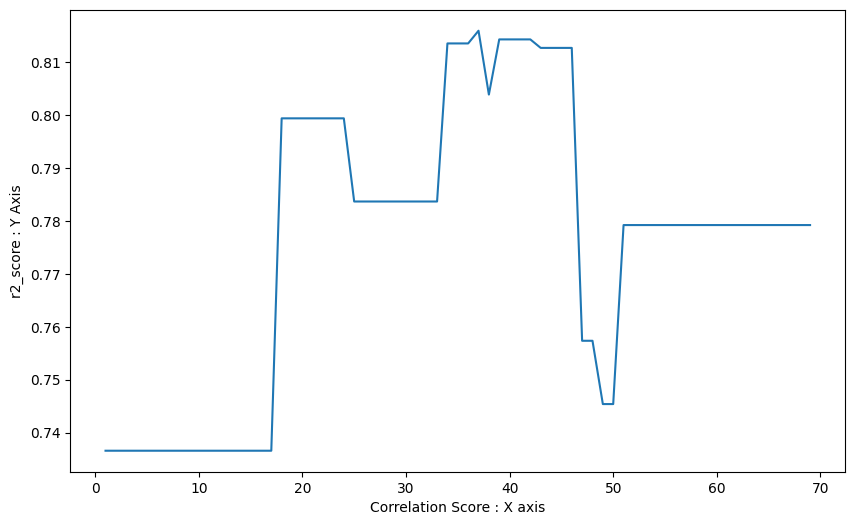

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv(r'D:\ML-Regression\Boston\boston.csv')
r2_score_list = []
corr_threshold_list = range(1,70,1)
corr_matrix = (df.corr().abs()[['MEDV']]).transpose()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression()

for threshold in corr_threshold_list:
    columns_ = []   
    X_train_opt_poly = []
    X_test_opt_poly = []


    for column in df.columns[:-1]:
        if corr_matrix[column][0] >= threshold/100:
            columns_.append(column)

    if not columns_:
        continue        
    X_ = df[columns_]
    y = df['MEDV']
    X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_, y, random_state=42, test_size=0.45)
    
    
    X_train_opt_poly = (poly_features.fit_transform(X_train_opt))
    X_test_opt_poly = (poly_features.fit_transform(X_test_opt))
    X_train_opt_poly = scaler.fit_transform(X_train_opt_poly)
    X_test_opt_poly = scaler.fit_transform(X_test_opt_poly)

    model.fit(X_train_opt_poly, y_train_opt)
    y_pred_opti = model.predict(X_test_opt_poly)
    r2_ = r2_score(y_test_opt, y_pred_opti)
    r2_score_list.append([threshold, r2_])
    

r2_score_list
plt.figure(figsize=(10,6))

corr_list = []
score = []

for element in r2_score_list:
    corr_list.append(element[0])
    score.append(element[-1])

plt.plot(corr_list, score)
plt.xlabel('Correlation Score : X axis')
plt.ylabel('r2_score : Y Axis')



In [3]:
good_columns

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

[]

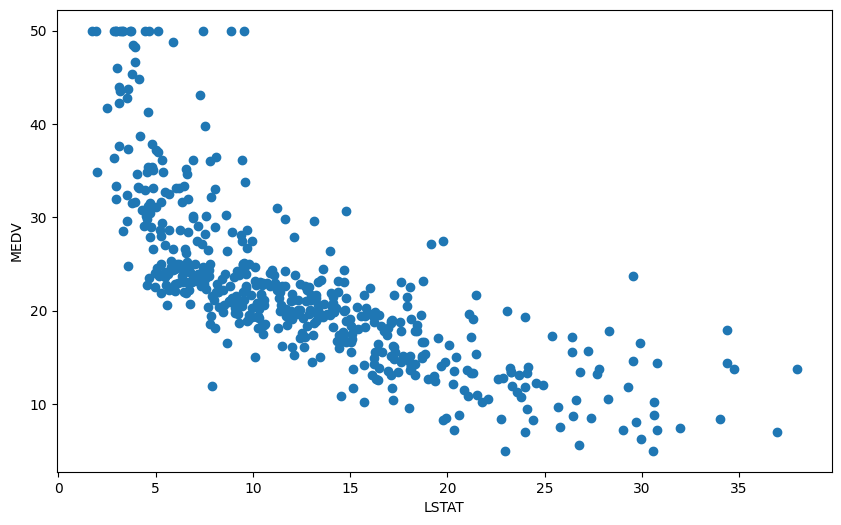

In [5]:
import matplotlib.pyplot as plt
x = df['LSTAT']
y = df['MEDV']

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot()

r2_score :  0.8452385433420758


[]

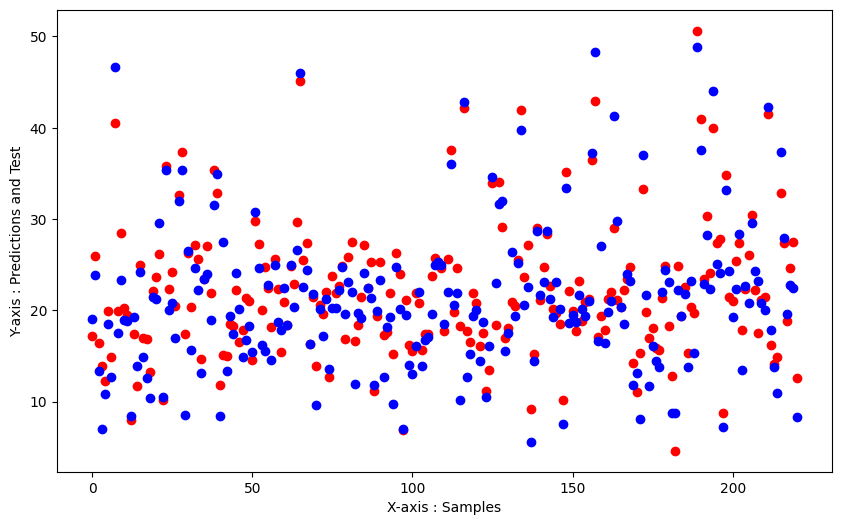

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
import joblib


poly_features = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression()
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.fit_transform(X_test_poly)

model.fit(X_train_poly,y_train)

y_pred = model.predict(X_test_poly)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('r2_score : ', r2)
plt.figure(figsize=(10,6))
plt.scatter(range(len(X_test)), y_pred, c='r')
plt.scatter(range(len(X_test)), y_test, c='b')
plt.xlabel('X-axis : Samples')
plt.ylabel('Y-axis : Predictions and Test')
plt.plot()







In [7]:
import joblib




['final_polynomial_reg_model_boston.joblib']

The given code below's objective is to automate the process of obtaining the optimum test_size. A graph of test_size vs r2_score is plotted to see which test_size suits the given model best. 

Test sizes below 30% and above 75% are removed entirely, as they provide misleading accuracies.

Test Size < 30% : Lack of testing provides misleading accuracy. Analogy : Studying for a year without any mock tests, hence no idea where you stand.
Test Size > 75% : Lack of training.                             Analogy : Not studying at all, but giving an enormous amount of mocks.


Working of the code:
    -Iteration of test sizes from 30% to 75%
    -Obtaining 10 r2 scores, and taking the mean of it
    -Plotting the graph, r2_score vs test_size

This process acts as a 'Study Routine' for the model, setting the frequency of tests, and study.


Text(0, 0.5, 'r2_score')

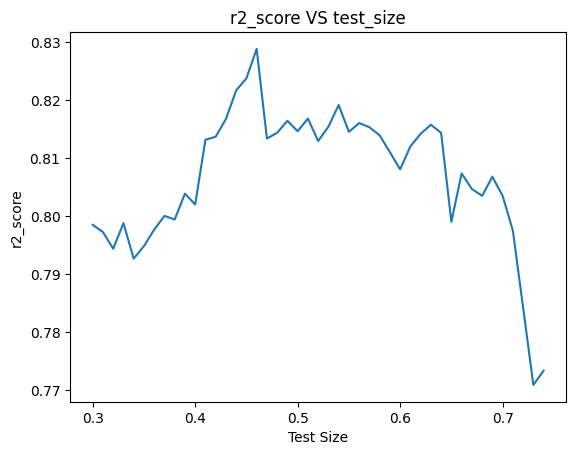

In [15]:
import joblib
from sklearn.metrics import r2_score
import statistics

poly_features = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression()
test_size = 0.5

test_size_list = []
r2_score_list = []



for i in range(30,75,1):
    total_scores = []
    for j in range(10):
        X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X,y,random_state=42, test_size=i/100)
        X_train_opt = poly_features.fit_transform(X_train_opt)
        X_test_opt = poly_features.fit_transform(X_test_opt)
        model.fit(X_train_opt, y_train_opt)
        y_pred_opt = model.predict(X_test_opt)
        r2 = r2_score(y_test_opt,y_pred_opt)
        total_scores.append(r2)
        if j == 9:
            test_size_list.append(i/100)
            r2_score_list.append(statistics.mean(total_scores))

plt.plot(test_size_list, r2_score_list)
plt.title('r2_score VS test_size')
plt.xlabel('Test Size')
plt.ylabel('r2_score')







Median Value of Price of house majorly depends on RM, TAX, PTRATIO, LSTAT

In [2]:
corr_matrix

,MEDV
CRIM,0.388305
ZN,0.360445
INDUS,0.483725
CHAS,0.175260
NOX,0.427321
RM,0.695360
AGE,0.376955
DIS,0.249929
RAD,0.381626
TAX,0.468536


Experimenting with SGD Regressor BELOW ( NOT THE BEST APPROACH )

Below is the code for the SGD Regressor model. Hyperparameter tuning has already been done using GridSearchCV, and the best parameters suited for the model have been chosen.

A difference based accuracy system is used to determine the accuracy of the model.

A scatterplot is used where red dots stand for predicted median value, and blue dots stand for the true median value.

20-05-2024 : Accuracy ranges from 60-70 %


Mean Squared Error : 30.326994544486503
r2 score : 0.6353073106192129


c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


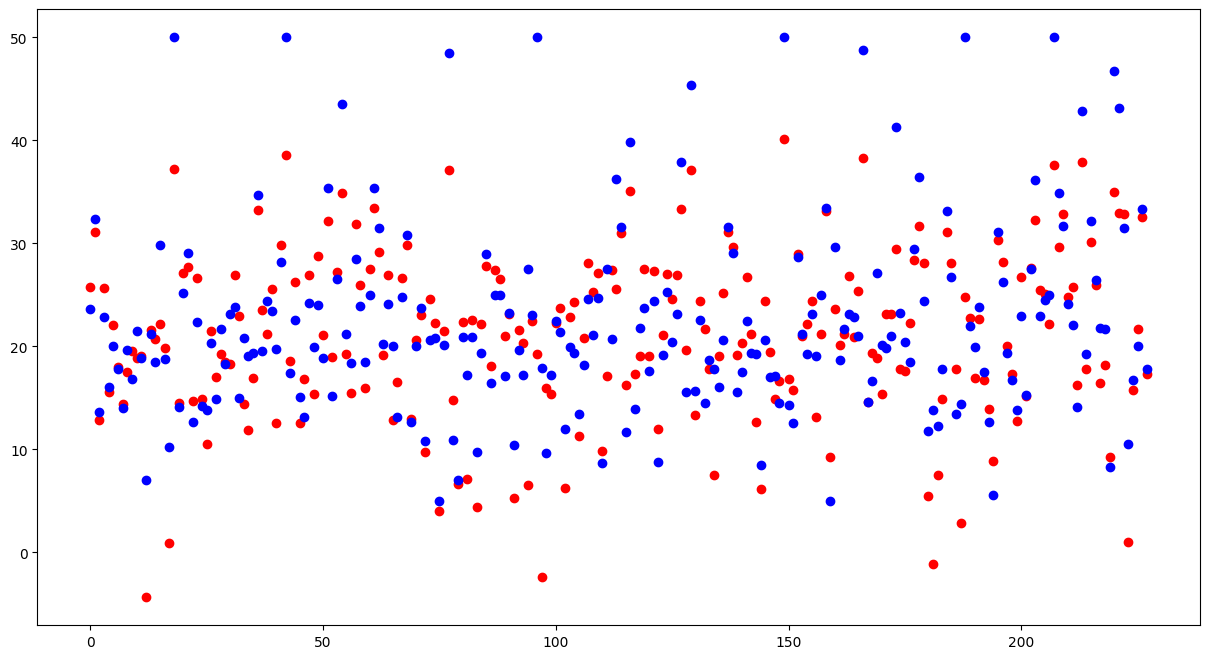

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV #used before already, to find the best parameters
from sklearn.metrics import mean_squared_error, r2_score


model = SGDRegressor(alpha= 0.01, learning_rate= 'adaptive', loss='epsilon_insensitive', max_iter=3000, n_iter_no_change= 15, penalty= 'l1', tol= 0.001)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(15,8))
plt.scatter(range(len(y_pred)), y_pred, c='red')
plt.scatter(range(len(y_test)), y_test, c='blue')
plt.plot()

print(f"Mean Squared Error : {mse}")
print(f"r2 score : {r2}")

    



array([ 4.98275341e+12, -1.37835447e+13, -4.34244504e+13, -7.82884194e+12,
        2.86869721e+12, -1.87714562e+12,  1.41123621e+13, -4.20519476e+13,
       -3.83113950e+13, -1.44975197e+13, -2.89888910e+13,  3.07205317e+13,
        3.15198659e+12])